In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
print(np.linspace(1,1.5,4))

[1.         1.16666667 1.33333333 1.5       ]


This notebook will give an introduction to different pair potentials and will allow you to:

- Plot them to visualize their behavior as the pair distance $r$ approaches 0 or $\infty$
- Automatically differentiate them to investigate the behavior of the force

First thing we will do is define some constants to be used for each potential.

**Constants in SI units for Coulomb potential**
- $\epsilon_0 = 8.85418782 × 10^{-12} \: C^2 \: s^2 \: kg^{-1} \: m^{-2}$ 
- $e = 1.60217662 × 10^{-19} \: C$

We will define constants in python with the names `eps_0` , `q_1`, and `q_2` for the
permittivity of free space, the charge of the proton, and the charge of the electron, respectively.

We will also define a list of separation values (called an array) using a python library called `numpy`.  We will try to make these separations relevant for the atomic scale, so we will use increments of Angstroms (or $10^{-10}$ meters).  We will call this array `r_coulomb`.

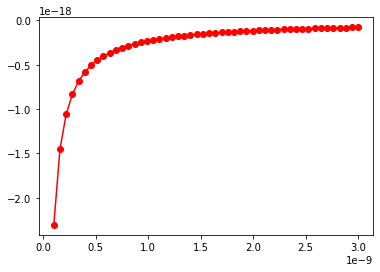

In [3]:
# permittivity
eps_0 = 8.85418782e-12

# charge of proton
q_1 = 1.60217662e-19

# charge of electron
q_2 = -1.60217662e-19

# create an array of separation values
r_coulomb = np.linspace(1e-10, 30e-10, 50)

V_coulomb = q_1 * q_2 / ( 4 * np.pi * eps_0 * r_coulomb)


plt.plot(r_coulomb, V_coulomb, 'r-o')
plt.show()

# We will fit a function called a *cubic spline* to the Coulomb potential.  A cubic spline fines cubic polynomials that best fit the adjacent pairs of points in the data you are trying to model, in this case the 50 values of the Coulomb potential stored in `V_coulomb` at the 
different separations stored in `r_coulomb`. The Python library `scipy` makes it easy to fit splines to data when the independent and dependent variables of the data you want to fit are stored in arrays:

`spline = UnivariateSpline(x_data, y_data, k=3)`

where `x_data` refers to the array containing the independent variable data and `y_data` refers to the array containing the dependent variable data.

**Question 1** What is the name we have used for the array containing our independent variable data for the Coulomb potential?

 *answer* The name that we have given to the array containing our independent variable data is 'r_coulomb'

**Question 2** What is the name we have used for the array containing our dependent variable data for the Coulomb potential?

 *answer* The name that we have given to the array containing our dependent variable is 'V_coulomb'
 
**Question 3** Using your answers to **1** and **2** above, write a line of code that will fit the Coulomb potential to a cubic spline that has the name `coulomb_spline`.

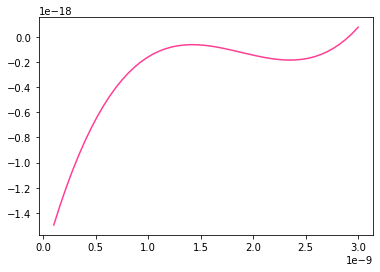

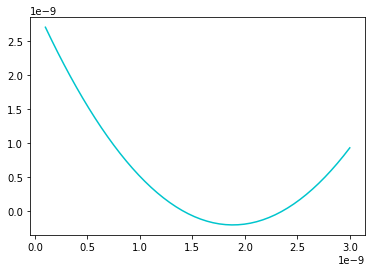

In [27]:
# write line of code fiting a cubic spline to the Coulomb potential
coulomb_spline = UnivariateSpline(r_coulomb, V_coulomb, k=3)
print(coulomb_spline)

coulomb_spline(r_coulomb)

plt.plot(r_coulomb, coulomb_spline(r_coulomb), '#FF3E96')
plt.show()

force_spline = coulomb_spline.derivative()

plt.plot(r_coulomb, force_spline(r_coulomb), '#00C5CD')
plt.show()

One extremely useful feature of splines is that finding the derivatives (and anti-derivatives or integrals) of the splines is extremely straightforward, and can be accomplished by 1 line of python code.  

**Question 4** If the the line connecting two points on a curve is approximated as a cubic polynomial as 

$$ f(x) = a + bx + cx^2 + dx^3 $$,

write an expression for the first derivative with respect to $x$:

$$ f'(x) = b + 2cx + 3dx^2 $$

The syntax for taking the derivate of the `coulomb_spline` and storing it in a new spline called `coulomb_derivative_spline` is 

`coulomb_prime = coulomb_spline.derivative()`

**Question 5** Compute the derivative of `coulomb_spline` in the cell below.  Comment on how the derivative of the Coulomb potential relates to the Coulomb force.
*Answer* The force is the negative of the derivative of the potential with respect to $r$,
$$ F(r) = \frac{-d}{dr} V(r) $$

In [5]:
# compute derivative of the Coulomb spline
coulomb_derivative_spline = coulomb_spline.derivative()

**Question 6** Given the expression for the Coulomb potential is 
$$V(r) = \frac{q_1 q_2}{4 \pi \epsilon_0 r} $$
Write an expression for the Coulomb Force.

*Answer* The Coulomb force is

$$ F(r) = \frac{q_1 q_2}{4 \pi \epsilon_0 r^2} $$

**Question 7** Use the expression for the Coulomb Force in **6** to define an array of
Coulomb force values at each value of `r_coulomb`; call the array of force values `F_coulomb`


In [6]:
# Define F_coulomb here 
F_coulomb = q_1 * q_2 / (4* np.pi * eps_0 * r_coulomb ** 2)
print(F_coulomb)

[-2.30707751e-08 -9.10468952e-09 -4.83823312e-09 -2.99486002e-09
 -2.03463475e-09 -1.47180707e-09 -1.11389594e-09 -8.72274676e-10
 -7.01522663e-10 -5.76409272e-10 -4.82008780e-10 -4.09033340e-10
 -3.51457918e-10 -3.05235574e-10 -2.67566386e-10 -2.36463233e-10
 -2.10484255e-10 -1.88562693e-10 -1.69895599e-10 -1.53869253e-10
 -1.40008065e-10 -1.27938884e-10 -1.17365613e-10 -1.08050878e-10
 -9.98025873e-11 -9.24639462e-11 -8.59059520e-11 -8.00216852e-11
 -7.47219235e-11 -6.99317397e-11 -6.55878391e-11 -6.16364576e-11
 -5.80316900e-11 -5.47341508e-11 -5.17098938e-11 -4.89295351e-11
 -4.63675364e-11 -4.40016165e-11 -4.18122654e-11 -3.97823406e-11
 -3.78967306e-11 -3.61420728e-11 -3.45065163e-11 -3.29795209e-11
 -3.15516873e-11 -3.02146117e-11 -2.89607621e-11 -2.77833719e-11
 -2.66763486e-11 -2.56341946e-11]


We will now use `coulomb_derivative_spline` to evaluate the Coulomb force to compare it to the array `F_coulomb` you just created.  The Spline takes one or more independent variable values and returns the corresponding dependent variable value(s) based on the fit that was determined by the underlying scipy computation.  Therefore, to compute an estimate of the Force from the `coulomb_derivative_spline` as follows:

`F_coulomb_from_spline = -1 * coulomb_derivative_spline(r_coulomb)`

where `r_coulomb` is the array of independent variable values, we have multiplied the spline acting on these values by -1 to match the Force definition, and `F_coulomb_from_spline` will be the resulting array of Force values from this approximation.

In principle, the two different methods (evaluating the analytic expression for the Coulomb force and using the capabilities of splines to differentiate the Coulomb potential) should yield results that are numerically identical.  We will test this in two different ways - by visual inspection through plotting the two different arrays, and by numerical comparison using the `numpy` function `allclose(array_1, array_2)` that returns `True` if `array_1` and `array_2` are element-by-element the same (to within numerical roundoff), and returns `False` if they are not.

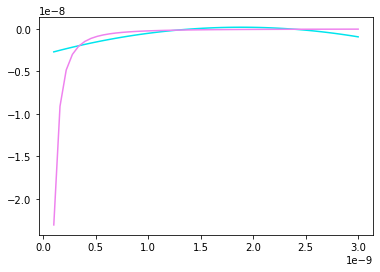

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [24]:
# Compute F_coulomb_from_spline here
F_coulomb_from_spline = -1 * coulomb_derivative_spline(r_coulomb)

# plot F_coulomb_from_spline vs r_array and F_coulomb vs r_array here
plt.plot(r_coulomb, F_coulomb_from_spline, '#00E5EE')
plt.plot(r_coulomb, F_coulomb, '#EE82EE')
plt.show()

# use np.allclose() on F_coulomb_from_spline and F_coulomb here
print(np.isclose(F_coulomb_from_spline, F_coulomb))


**Constants in SI units for Harmonic Potential**
- $k = 970 \: kg \: m \: s^{-2}$ (for the HF molecule) (From National Institutes of Standards and Technologies)

We will define constants in python with the names `k` for the force constant,
and also define a list of separation values (called an array) again using `numpy`.  We will try to make these separations relevant for the molecular scale, so we will use increments of Angstroms (or $10^{-10}$ meters).  We will call this array `r_harmonic`.

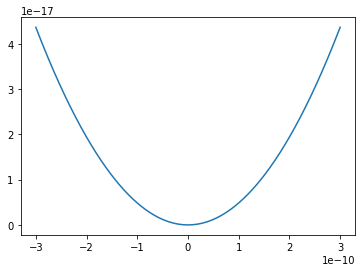

In [8]:
k = 970
r_harmonic = np.linspace(-3e-10, 3e-10, 1000)
V_harmonic = 0.5 * k * r_harmonic ** 2

plt.plot(r_harmonic, V_harmonic)
plt.show()

**Question 8** Write an expression for the Force based on the Harmonic potential.

$$ F(r) = - \frac{d}{dr} V(r) = -kr $$

Similar to what we did before, we will fit a spline to `V_harmonic` called `harmonic_spline` and use it to estimate the force associated with the Harmonic potential.  We will also calculate an array of force values using the expression we derived in **8**. We will check for agreement both visually through plotting, and numerically using `np.allclose()`.

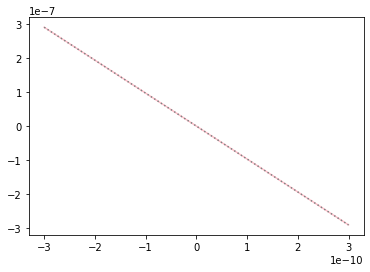

True


In [9]:
# Compute F from Harmonic potential using your result from 8 here
F_harmonic = -k * r_harmonic

# Fit a spline to V_Harmonic here
harmonic_spline = UnivariateSpline(r_harmonic, V_harmonic, k=3)

# Use the derivative() method of the spline to define a force
F_harmonic_from_spline = harmonic_spline.derivative()

# plot the spline force vs the force from your expression here
plt.plot(r_harmonic, F_harmonic, "pink")
plt.plot(r_harmonic, -1 * F_harmonic_from_spline(r_harmonic), color="gray", linestyle='dotted')
plt.show()

# use np.allclose() to check if these two match
print(np.allclose(F_harmonic, -1 * F_harmonic_from_spline(r_harmonic)))

**Lennard-Jones Constants in SI Units**
- $\epsilon = 1.65621 × 10^{-21}$ J 
- $\sigma = 3.4 × 10^{-10}$ m
(For Argon)

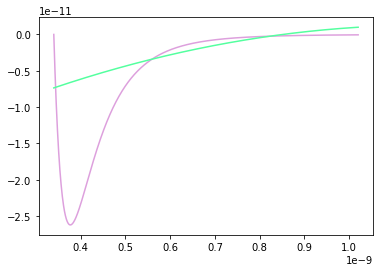

In [25]:
eps = 1.656768e-21
sig = 3.4e-10

r_lj = np.linspace(1*sig, 3*sig, 1000)
V_lj = 4 * eps * ((sig/r_lj)**12 - (sig/r_lj)**6)
F_lj = 24 * eps * r_lj * (sig**(12) * r_lj**(-14) - sig**6 * r_lj**(-8))

# fit a cubic spline to V_lj
lj_spline = UnivariateSpline(r_lj, V_lj, k=3)

lj_force_from_spline = lj_spline.derivative()

#plt.plot(r_lj, V_lj, '#FF69B4')
#plt.plot(r_lj, lj_spline(r_lj),'#7FFFD4')
plt.plot(r_lj, F_lj, '#DDA0DD')
plt.plot(r_lj, -1 * lj_force_from_spline(r_lj), '#54FF9F')
plt.show()

**Question 9** Write an expression for the Force based on the Lennard-Jones potential.

$$ F(r) = 24 \epsilon r \left(2 \left( \frac{\sigma^{12}}{r^{14}} \right) - \left(\frac{\sigma^6}{r^8}\right)\right) $$ 

Similar to what we did before, we will fit a spline to `V_lj` called `lj_spline` and use it to estimate the force associated with the Harmonic potential.  We will also calculate an array of force values using the expression we derived in **9**. We will check for agreement both visually through plotting, and numerically using `np.allclose()`.